# 1. Lecture des données

### 1. a) Lecture des données

In [1]:
#Importation des librairies
import pandas as pd
import os

#Specification des chemins
os.chdir("C:/Users/Tang/Desktop/Jedha/Classe/Coding Challenge")

#Lecture des datasets avec pandas
fraud = pd.read_csv("Fraud_Data.csv")
ip = pd.read_csv("IpAddress_to_Country.csv")

### 1. b) Dataset Fraude

In [2]:
#Lecture des datasets de fraudes
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
#Taille du dataset de fraude
fraud.shape

(151112, 11)

### 1. c) Dataset Ip

In [4]:
#Lecture des datasets des ip
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


Commentaire : on remarque que les pays se repètent parfois (exemple 3 fois "China" et 2 fois "Autralia")

In [5]:
#Taille du dataset de fraude
ip.shape

(138846, 3)

# 2. Preprocessing

On souhaite rassembler les datasets Fraude et Ip afin de connaître le pays de la personne qui a fait la transaction

#### Méthode avec Mask (plus rapide mais moins compréhensible)

In [6]:
#On crée la liste country qui comporte :
#des listes qui comporte le pays de transaction de l'utilisateur en fonction de son adresse ip
country = [
    list(
        ip["country"][
            (ip["lower_bound_ip_address"] < user_ip) & (ip["upper_bound_ip_address"] > user_ip)
        ]) 
    for user_ip in fraud["ip_address"]]

#Certaine liste dans country sont vide, on les renomme donc None
for i in range(len(country)):
    if len(country[i]) == 1:
        country[i] = country[i][0]
    else:
        country[i] = None

#On ajoute la colonne country dans fraud
fraud["country"] = country

#### Méthode avec boucle (plus long mais plus compréhensible)

In [17]:
#On crée la liste country dans laquelle on ajoute le pays d'où vient l'utilisateur
country = []

#On boucle sur les ip des utilisateurs
for user_ip in fraud["ip_address"][:5]:
    
    #On boucle sur les valeurs des ip inférieur
    for indice in range(len(ip)):
        if user_ip > ip["lower_bound_ip_address"][indice] and user_ip < ip["upper_bound_ip_address"][indice]:
            country.append(ip["country"][indice])
            break

#On créer la colonne country dans le dataset fraud qui sont les pays d'où viennent les transactions des utilisateurs
#fraud["country"] = country

In [18]:
fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,None
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,United States


# 3. Analyse des données

### 3. a) Distribution de nombre de transaction frauduleux et non frauduleux

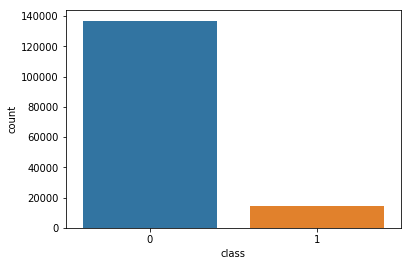

In [45]:
import seaborn as sns
sns.countplot(x = "class", data = fraud)

Nous avons un dataset assez disproportionné, un grand nombre de transaction non frauduleux contre quelques transaction frauduleux

In [49]:
fraud["class"].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [58]:
fraud["class"].value_counts(100)

0    0.906354
1    0.093646
Name: class, dtype: float64

90,60% de transaction non frauduleux et 0,09% de transaction frauduleux

### 3. b) Pays dont les transactions frauduleuses sont en moyennes à plus de 20%

In [115]:
pays_fraud_moy = fraud.groupby("country").mean()["class"]
pays_grand_fraud = pd.DataFrame(pays_fraud_moy[pays_fraud_moy > 0.20])
pays_grand_fraud

,class
country,
Bolivia,0.245283
Ecuador,0.264151
Ireland,0.229167
Kuwait,0.233333
Luxembourg,0.388889
Namibia,0.434783
New Zealand,0.223022
Peru,0.260504
Sri Lanka,0.419355


In [118]:
pays_grand_fraud["country"] = pays_grand_fraud.index
pays_grand_fraud = pays_grand_fraud.reset_index(drop = True)

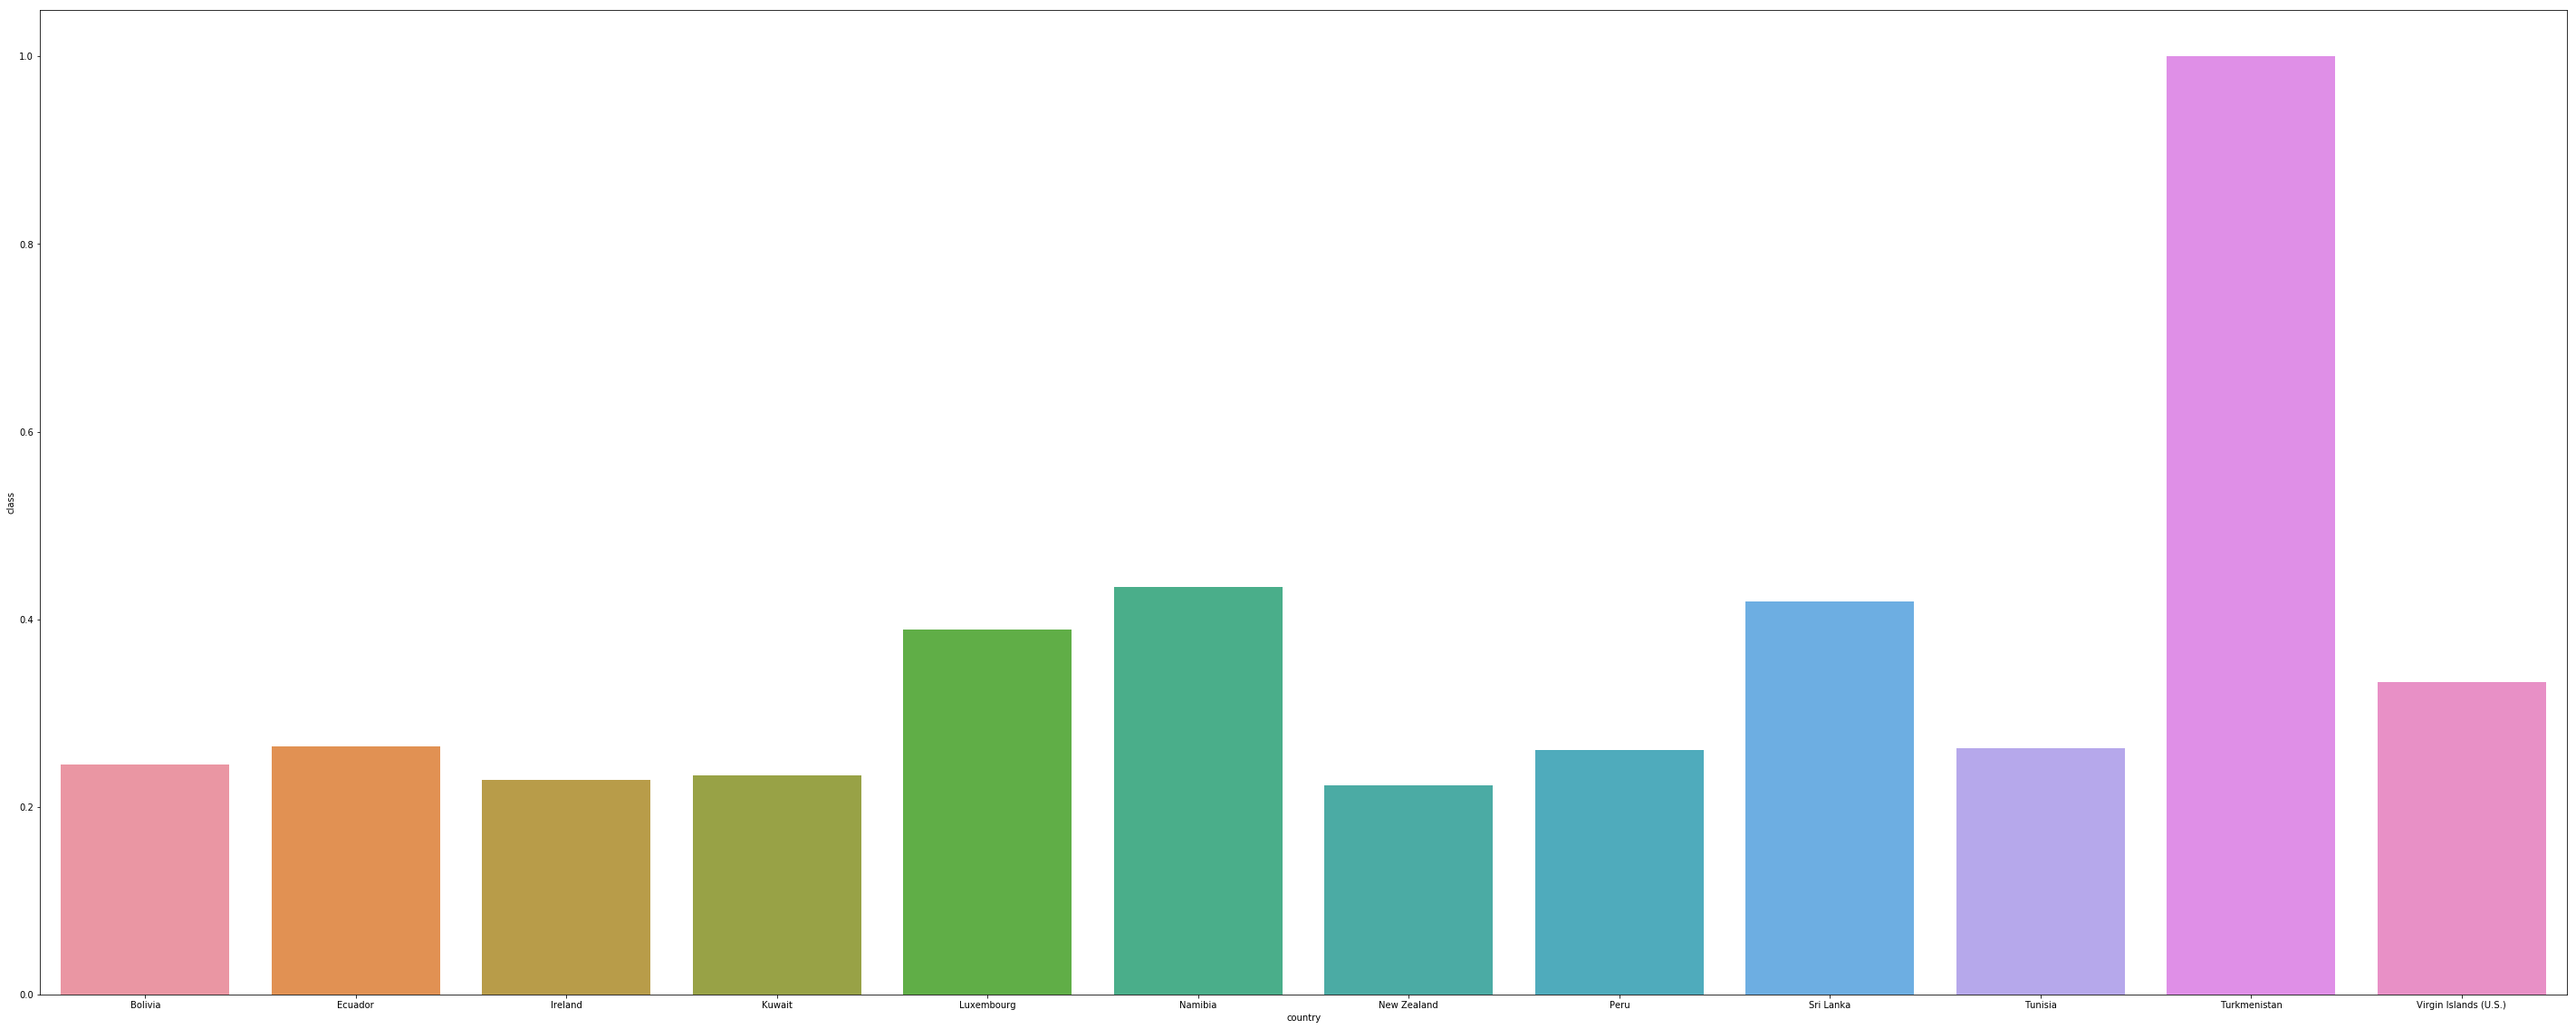

In [125]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(50,20))
sns.barplot(x="country", y="class", data=pays_grand_fraud, ax= ax)

Les pays comme le Turkmenistan(100%), le Namibia(43,47), le Sri Lanka (41,93%), Luxembourg(38,88%) sont les pays qui font le plus de transaction frauduleux en moyennes

### 3. c) Distribution de nombre de transaction frauduleux et non frauduleux

In [137]:
pd.DataFrame(fraud.groupby("sex")["class"].count())

,class
sex,
F,62819
M,88293


In [139]:
pd.DataFrame(fraud.groupby("sex")["class"].mean())

,class
sex,
F,0.091007
M,0.095523


Le nombre de fraude entre homme et femme est presque identiques